In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
# sklearn Models
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Split data with stratified cv
from sklearn.model_selection import StratifiedKFold, train_test_split

# Encoding of classifications
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import svm

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.activations import relu
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 

In [ ]:
from tensorflow.keras.metrics import CategoricalAccuracy, Precision, Recall
from tensorflow.keras.utils import to_categorical, normalize

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble import RandomForestClassifier as RF


from collections import Counter

In [ ]:
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "Tor_NonTor.csv", index=False, encoding='utf-8-sig')

NameError: ignored

In [ ]:


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset=pd.read_csv(r'/content/drive/MyDrive/Tor_NonTor.csv')
dataset.head()

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,116516054,116474040,116516010,918,502,41460623,41459681,9.706170e+06,9.709668e+06,0.223145,...,1.040000e+07,2882883,1.660000e+07,41798626,1.430000e+07,2551209,1.640000e+07,41459595,1.430000e+07,CHAT
1,110542890,110501911,110542850,2880,4140,34532250,34532119,3.946497e+06,4.421714e+06,0.497544,...,5.805017e+06,1412470,1.100000e+07,34872202,9.840158e+06,1412427,1.070000e+07,34532119,9.860561e+06,CHAT
2,101111380,101110992,101111380,2718,283,21385880,21385877,4.814809e+06,4.814828e+06,0.435164,...,5.359914e+06,1383632,9.158663e+06,21714802,7.757389e+06,1383578,8.864222e+06,21385830,7.606093e+06,CHAT
3,115531998,115531950,115531952,935,525,28913072,28913070,4.621278e+06,4.621278e+06,0.450092,...,5.481550e+06,1318581,7.679812e+06,29294644,8.262810e+06,1318537,7.497432e+06,28913021,8.105855e+06,CHAT
4,88160003,88159956,88159952,350915,351697,41467426,41467424,6.781535e+06,6.781535e+06,0.317604,...,8.469402e+06,1243172,1.100000e+07,41995078,1.340000e+07,1243129,1.080000e+07,41467377,1.320000e+07,CHAT


In [ ]:
dataset.class1.value_counts()

VOIP               2841
VIDEO-STREAMING    1210
FILE-TRANSFER       914
CHAT                519
BROWSING            474
EMAIL               372
P2P                 139
AUDIO-STREAMING     116
Name: class1, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
import time
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
dataset['class1'].unique()
dataset['class1']= label_encoder.fit_transform(dataset['class1']) 
dataset['class1'].unique()



array([2, 7, 3, 4, 1, 0, 5, 6])

In [ ]:
mainx= dataset.iloc[:,0:23].values
mainy = dataset.iloc [:,-1].values

In [ ]:
Scaler_X = StandardScaler()
mainx = Scaler_X.fit_transform(mainx)

In [ ]:

counter = Counter(mainy)
print('Before',counter)
smt = SMOTE()
x_sm, y_sm = smt.fit_resample(mainx, mainy)
counter = Counter(y_sm)
print('After',counter)

Before Counter({7: 2841, 6: 1210, 4: 914, 2: 519, 1: 474, 3: 372, 5: 139, 0: 116})
After Counter({2: 2841, 7: 2841, 3: 2841, 4: 2841, 1: 2841, 0: 2841, 5: 2841, 6: 2841})


In [ ]:
# Splitting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(x_sm, y_sm, train_size=0.8, stratify = y_sm, random_state=100)

In [ ]:
my_tags=['CHAT', 'VOIP', 'VIDEO-STREAMING','FILE-TRANSFER', 'BROWSING','EMAIL','P2P','AUDIO-STREAMING']

In [ ]:
tic=time.time()
model = KNeighborsClassifier(n_neighbors=16,p=1 )
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred,target_names=my_tags))
toc=time.time()
print("Time Taken without PCA:")
print(toc-tic)

                 precision    recall  f1-score   support

           CHAT       0.86      0.93      0.89       569
           VOIP       0.75      0.74      0.74       568
VIDEO-STREAMING       0.78      0.80      0.79       568
  FILE-TRANSFER       0.77      0.85      0.81       568
       BROWSING       0.81      0.78      0.79       568
          EMAIL       0.80      0.92      0.85       568
            P2P       0.69      0.50      0.58       568
AUDIO-STREAMING       1.00      0.95      0.97       569

       accuracy                           0.81      4546
      macro avg       0.80      0.81      0.80      4546
   weighted avg       0.80      0.81      0.80      4546

Time Taken without PCA:
3.155024766921997


In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
knprecision,knrecall,knfscore,supportkn=score(y_test,y_pred,average='macro')
print ('Precision : {}'.format(knprecision))
print ('Recall    : {}'.format(knrecall))
print ('F-score   : {}'.format(knfscore))
#print ('Support   : {}'.format(support))

Precision : 0.804492474552811
Recall    : 0.8074639069036362
F-score   : 0.8029739368841828


In [ ]:
knaccuracy=0.81

In [ ]:
tic=time.time()
clf = svm.SVC(kernel='rbf')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred,target_names=my_tags))
toc=time.time()
print("Time Taken with SVM:")
print(toc-tic)

                 precision    recall  f1-score   support

           CHAT       0.80      0.72      0.76       569
           VOIP       0.46      0.40      0.43       568
VIDEO-STREAMING       0.46      0.58      0.51       568
  FILE-TRANSFER       0.56      0.64      0.60       568
       BROWSING       0.42      0.64      0.51       568
          EMAIL       0.54      0.49      0.52       568
            P2P       0.46      0.10      0.16       568
AUDIO-STREAMING       0.80      0.96      0.87       569

       accuracy                           0.57      4546
      macro avg       0.56      0.57      0.55      4546
   weighted avg       0.56      0.57      0.55      4546

Time Taken with SVM:
29.924743175506592


In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
svprecision,svrecall,svfscore,supportkn=score(y_test,y_pred,average='macro')
print ('Precision : {}'.format(svprecision))
print ('Recall    : {}'.format(svrecall))
print ('F-score   : {}'.format(svfscore))
#print ('Support   : {}'.format(support))

Precision : 0.5640356082622139
Recall    : 0.5665328195004826
F-score   : 0.5454718684428752


In [ ]:
svaccuracy=0.56

In [ ]:
tic=time.time()
classifier = DT(criterion='entropy', random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred,target_names=my_tags))
toc=time.time()
print("Time Taken:")
print(toc-tic)

                 precision    recall  f1-score   support

           CHAT       0.95      0.97      0.96       569
           VOIP       0.77      0.82      0.79       568
VIDEO-STREAMING       0.89      0.88      0.89       568
  FILE-TRANSFER       0.84      0.85      0.85       568
       BROWSING       0.92      0.90      0.91       568
          EMAIL       0.96      0.97      0.97       568
            P2P       0.85      0.80      0.83       568
AUDIO-STREAMING       0.98      0.97      0.98       569

       accuracy                           0.90      4546
      macro avg       0.90      0.90      0.90      4546
   weighted avg       0.90      0.90      0.90      4546

Time Taken:
1.2385766506195068


In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
dtprecision,dtrecall,dtfscore,supportkn=score(y_test,y_pred,average='macro')
print ('Precision : {}'.format(dtprecision))
print ('Recall    : {}'.format(dtrecall))
print ('F-score   : {}'.format(dtfscore))
#print ('Support   : {}'.format(support))

Precision : 0.8945760974024412
Recall    : 0.8948214219411372
F-score   : 0.8945807746638932


In [ ]:
dtaccuracy=0.89

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RF
tic=time.time()
classifier = RF(n_estimators=16, criterion='gini', random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))
toc=time.time()
print("Time Taken:")
print(toc-tic)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       569
           1       0.88      0.89      0.89       568
           2       0.91      0.95      0.93       568
           3       0.92      0.95      0.93       568
           4       0.97      0.95      0.96       568
           5       0.98      0.99      0.99       568
           6       0.93      0.86      0.89       568
           7       1.00      0.97      0.98       569

    accuracy                           0.94      4546
   macro avg       0.94      0.94      0.94      4546
weighted avg       0.94      0.94      0.94      4546

Time Taken:
0.8788602352142334


In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
rfprecision,rfrecall,rffscore,supportkn=score(y_test,y_pred,average='macro')
print ('Precision : {}'.format(rfprecision))
print ('Recall    : {}'.format(rfrecall))
print ('F-score   : {}'.format(rffscore))
#print ('Support   : {}'.format(support))

Precision : 0.9445958784714075
Recall    : 0.9441129421520336
F-score   : 0.9440043793405848


In [ ]:
rfaccuracy=0.94

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from keras import backend as K


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((18182, 23), (4546, 23), (18182,), (4546,))

In [ ]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [ ]:
# Import the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv1D,Dropout,BatchNormalization
from tensorflow.keras.optimizers import *

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.utils import shuffle

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.metrics import *
# v4

ACCURACY_LIST = []

from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.models import Model

METRICS = [

      BinaryAccuracy(name='accuracy'),
      Precision(name='precision'),
      Recall(name='recall'),
      AUC(name='auc'),
]

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=23, kernel_initializer='RandomUniform', activation='relu'))
model.add(Dense(256,  kernel_initializer='RandomUniform', activation='relu'))
model.add(Dense(512,  kernel_initializer='RandomUniform', activation='relu'))
model.add(Dense(256,  kernel_initializer='RandomUniform', activation='relu'))
model.add(Dense(512,  kernel_initializer='RandomUniform', activation='relu'))

model.add(Dense(8,activation='softmax'))
#model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=METRICS)

In [ ]:
# compiling the model
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=METRICS)

In [ ]:
%%time
#fitting the model
import time
tic=time.time()
history=model.fit(X_train,y_train,epochs=100, validation_data=(X_test,y_test))
toc=time.time()
print("Time Taken is:")
print(toc-tic)

Epoch 1/100
569/569 [==============================] - 25s 44ms/step - loss: 0.1230 - accuracy: 0.9893 - precision: 0.9615 - recall: 0.9524 - auc: 0.9980 - val_loss: 0.3343 - val_accuracy: 0.9811 - val_precision: 0.9298 - val_recall: 0.9177 - val_auc: 0.9885
Epoch 2/100
569/569 [==============================] - 15s 26ms/step - loss: 0.1265 - accuracy: 0.9891 - precision: 0.9609 - recall: 0.9517 - auc: 0.9980 - val_loss: 0.3909 - val_accuracy: 0.9795 - val_precision: 0.9224 - val_recall: 0.9125 - val_auc: 0.9877
Epoch 3/100
569/569 [==============================] - 16s 29ms/step - loss: 0.1346 - accuracy: 0.9883 - precision: 0.9585 - recall: 0.9476 - auc: 0.9978 - val_loss: 0.3614 - val_accuracy: 0.9790 - val_precision: 0.9219 - val_recall: 0.9092 - val_auc: 0.9877
Epoch 4/100
569/569 [==============================] - 16s 29ms/step - loss: 0.1034 - accuracy: 0.9911 - precision: 0.9685 - recall: 0.9600 - auc: 0.9988 - val_loss: 0.3024 - val_accuracy: 0.9844 - val_precision: 0.9422 - v

In [ ]:
ann_accuracy=0.987
ann_recall=0.94
ann_precision=0.94
ann_f1score=0.94

In [ ]:
tic=time.time()
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgb = XGBClassifier(n_estimators=150)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(classification_report(y_test,y_pred,target_names=my_tags))
toc=time.time()
print("Time Taken for Xgboost:")
print(toc-tic)



                 precision    recall  f1-score   support

           CHAT       0.94      0.96      0.95       569
           VOIP       0.70      0.69      0.70       568
VIDEO-STREAMING       0.74      0.84      0.79       568
  FILE-TRANSFER       0.81      0.80      0.81       568
       BROWSING       0.92      0.85      0.88       568
          EMAIL       0.96      0.98      0.97       568
            P2P       0.77      0.75      0.76       568
AUDIO-STREAMING       1.00      0.97      0.98       569

       accuracy                           0.85      4546
      macro avg       0.86      0.85      0.86      4546
   weighted avg       0.86      0.85      0.86      4546

Time Taken for Xgboost:
24.8429958820343


In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
xgprecision,xgrecall,xgfscore,xgkn=score(y_test,y_pred,average='macro')
print ('Precision : {}'.format(xgprecision))
print ('Recall    : {}'.format(xgrecall))
print ('F-score   : {}'.format(xgfscore))
#print ('Support   : {}'.format(support))

Precision : 0.8596134060166029
Recall    : 0.8576295205326865
F-score   : 0.8575692611353536


In [ ]:
xgaccuracy=0.86

In [ ]:
df_results = pd.DataFrame({'classifier':['Accuracy','Accuracy','Accuracy','Accuracy','Recall','Recall','Recall','Recall','Precision','Precision','Precision','Precision','F1-Score','F1-Score','F1-Score','F1-Score'],
                           'data_set':['Random Forest','Gradient Boosting','SVM','ANN']*4,
                           'accuracy':[rfaccuracy,gbaccuracy,svaccuracy,ann_accuracy,rfrecall,gbrecall,svrecall,ann_recall,rfprecision,gbprecision,svprecision,ann_precision,rffscore,gbfscore,svfscore,ann_f1score]
                           })

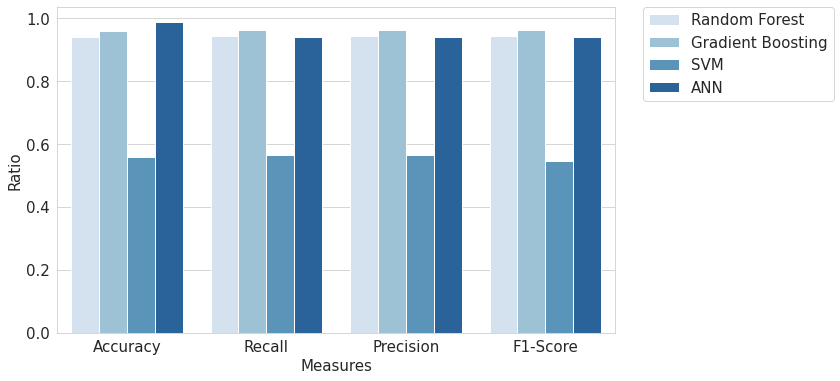

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x = 'classifier', y = 'accuracy', hue = 'data_set', data = df_results,palette = "Blues")
ax.set_xlabel('Measures', fontsize = 15)
ax.set_ylabel('Ratio', fontsize = 15)
ax.tick_params(labelsize = 15)

#Separate legend from graph
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0., fontsize = 15)

In [ ]:
knn_time=3.15
svm_time=28.3
dt_time=2.33
rf_time=1.5
xg_time=30
ann_time=1535

In [ ]:
df_results = pd.DataFrame({'classifier':['KNN','SVM','DecisionTree','Random Forest','XgBoost','ANN'],
                           'data_set':['KNN','SVM','DecisionTree','Random Forest','XgBoost','ANN'],
                           'accuracy':[knn_time,svm_time,dt_time,rf_time,xg_time,ann_time]
                           })

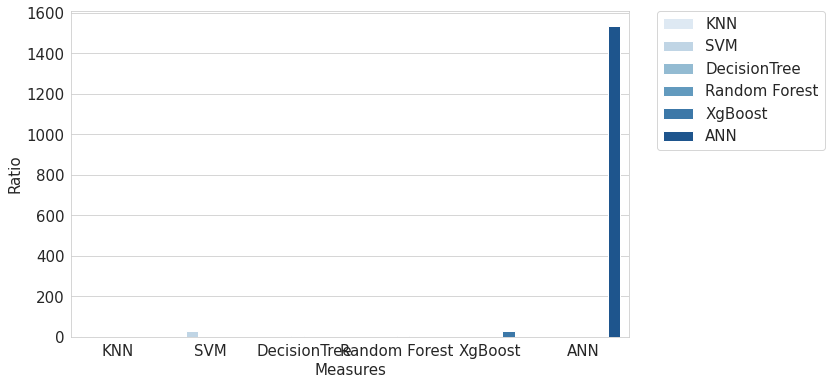

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x = 'classifier', y = 'accuracy', hue = 'data_set', data = df_results,palette = "Blues")
ax.set_xlabel('Measures', fontsize = 15)
ax.set_ylabel('Ratio', fontsize = 15)
ax.tick_params(labelsize = 15)

#Separate legend from graph
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0., fontsize = 15)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time

In [ ]:
learning_rates = [0.5]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=200, learning_rate = learning_rate, max_features=22, max_depth = 10, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))

Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 0.966


In [ ]:
tic=time.time()
gb = GradientBoostingClassifier(n_estimators=200, learning_rate = learning_rate, max_features=22, max_depth = 12, random_state = 0)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print(classification_report(y_test,y_pred,target_names=my_tags))
toc=time.time()
print("Time Taken for Xgboost:")
print(toc-tic)

                 precision    recall  f1-score   support

           CHAT       0.98      0.99      0.99       569
           VOIP       0.92      0.91      0.91       568
VIDEO-STREAMING       0.93      0.96      0.95       568
  FILE-TRANSFER       0.93      0.97      0.95       568
       BROWSING       0.99      0.97      0.98       568
          EMAIL       0.99      0.99      0.99       568
            P2P       0.94      0.92      0.93       568
AUDIO-STREAMING       1.00      0.98      0.99       569

       accuracy                           0.96      4546
      macro avg       0.96      0.96      0.96      4546
   weighted avg       0.96      0.96      0.96      4546

Time Taken for Xgboost:
172.59633374214172


In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
gbprecision,gbrecall,gbfscore,gbkn=score(y_test,y_pred,average='macro')
print ('Precision : {}'.format(gbprecision))
print ('Recall    : {}'.format(gbrecall))
print ('F-score   : {}'.format(gbfscore))

Precision : 0.9608676515213443
Recall    : 0.9606151297061809
F-score   : 0.960631351702389


In [ ]:
gbaccuracy=0.96

# PCA

In [ ]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
dataset['class1']= label_encoder.fit_transform(dataset['class1']) 
dataset['class1'].unique()

array([2, 7, 3, 4, 1, 0, 5, 6])

In [ ]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
y_sm= label_encoder.fit_transform(y_sm) 
#dataset['class1'].unique()

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
from sklearn.decomposition import PCA
train_PCA = PCA(n_components=15).fit_transform(x_sm)


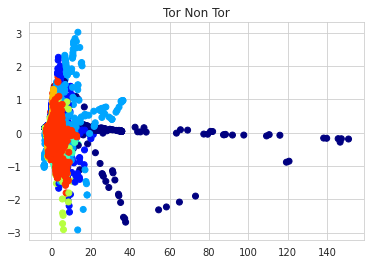

In [ ]:
import matplotlib
%matplotlib inline
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10)
plt.title('Tor Non Tor')
plt.scatter(train_PCA[:,0],train_PCA[:,9],c=y_sm,cmap=plt.cm.jet)

In [ ]:
X_transform = pd.DataFrame(data =train_PCA, columns = ["principal component 1", "principal component 2","principal component 3", "principal component 4","principal component 5", "principal component 6","principal component 7", "principal component 8","principal component 9", "principal component 10","principal component 11","principal component 12", "principal component 13","principal component 14", "principal component 15"])
X_train, X_test, y_train, y_test = train_test_split(X_transform, y_sm, test_size=0.15, random_state=32)
from sklearn.metrics import classification_report

In [ ]:
tic=time.time()
model = KNeighborsClassifier(n_neighbors=1,p=1 )
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred,target_names=my_tags))
toc=time.time()
print("Time Taken with PCA:")
print(toc-tic)

                 precision    recall  f1-score   support

           CHAT       0.94      0.97      0.95       432
           VOIP       0.91      0.90      0.91       431
VIDEO-STREAMING       0.92      0.95      0.94       464
  FILE-TRANSFER       0.93      0.92      0.93       411
       BROWSING       0.89      0.90      0.90       419
          EMAIL       0.93      0.95      0.94       394
            P2P       0.86      0.82      0.84       439
AUDIO-STREAMING       1.00      0.96      0.98       420

       accuracy                           0.92      3410
      macro avg       0.92      0.92      0.92      3410
   weighted avg       0.92      0.92      0.92      3410

Time Taken with PCA:
0.2841672897338867


In [ ]:
tic=time.time()
gb = GradientBoostingClassifier(n_estimators=300, learning_rate = learning_rate, max_features=15, max_depth = 10, random_state = 0)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print(classification_report(y_test,y_pred,target_names=my_tags))
toc=time.time()
print("Time Taken for Xgboost:")
print(toc-tic)

                 precision    recall  f1-score   support

           CHAT       0.97      0.97      0.97       432
           VOIP       0.92      0.89      0.90       431
VIDEO-STREAMING       0.93      0.97      0.95       464
  FILE-TRANSFER       0.92      0.96      0.94       411
       BROWSING       0.94      0.94      0.94       419
          EMAIL       0.97      0.99      0.98       394
            P2P       0.89      0.84      0.87       439
AUDIO-STREAMING       1.00      0.97      0.98       420

       accuracy                           0.94      3410
      macro avg       0.94      0.94      0.94      3410
   weighted avg       0.94      0.94      0.94      3410

Time Taken for Xgboost:
260.34009981155396


In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
gbprecision,gbrecall,gbfscore,supportkn=score(y_test,y_pred,average='macro')
print ('Precision : {}'.format(gbprecision))
print ('Recall    : {}'.format(gbrecall))
print ('F-score   : {}'.format(gbfscore))
#print ('Support   : {}'.format(support))

Precision : 0.9420695706161012
Recall    : 0.9423050830145197
F-score   : 0.9418757149944202


In [ ]:
gbaccuracy=0.95

In [ ]:
tic=time.time()
clf = svm.SVC(kernel='rbf')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred,target_names=my_tags))
toc=time.time()
print("Time Taken with SVM:")
print(toc-tic)

                 precision    recall  f1-score   support

           CHAT       0.77      0.70      0.73       432
           VOIP       0.48      0.50      0.49       431
VIDEO-STREAMING       0.56      0.59      0.57       464
  FILE-TRANSFER       0.55      0.62      0.58       411
       BROWSING       0.43      0.68      0.53       419
          EMAIL       0.52      0.46      0.49       394
            P2P       0.42      0.10      0.16       439
AUDIO-STREAMING       0.79      0.96      0.87       420

       accuracy                           0.57      3410
      macro avg       0.57      0.58      0.55      3410
   weighted avg       0.57      0.57      0.55      3410

Time Taken with SVM:
34.17808771133423


In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
svprecision,svrecall,svfscore,supportkn=score(y_test,y_pred,average='macro')
print ('Precision : {}'.format(svprecision))
print ('Recall    : {}'.format(svrecall))
print ('F-score   : {}'.format(svfscore))
#print ('Support   : {}'.format(support))

Precision : 0.5660044182823534
Recall    : 0.5755392108783446
F-score   : 0.5531318386659951


In [ ]:
svaccuracy=0.57

In [ ]:
tic=time.time()
classifier = DT(criterion='entropy', random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred,target_names=my_tags))
toc=time.time()
print("Time Taken:")
print(toc-tic)

                 precision    recall  f1-score   support

           CHAT       0.94      0.94      0.94       432
           VOIP       0.83      0.80      0.82       431
VIDEO-STREAMING       0.88      0.90      0.89       464
  FILE-TRANSFER       0.84      0.89      0.86       411
       BROWSING       0.90      0.89      0.89       419
          EMAIL       0.91      0.93      0.92       394
            P2P       0.81      0.77      0.79       439
AUDIO-STREAMING       0.98      0.96      0.97       420

       accuracy                           0.88      3410
      macro avg       0.88      0.89      0.88      3410
   weighted avg       0.88      0.88      0.88      3410

Time Taken:
1.150254726409912


In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
dtprecision,dtrecall,dtfscore,supportkn=score(y_test,y_pred,average='macro')
print ('Precision : {}'.format(dtprecision))
print ('Recall    : {}'.format(dtrecall))
print ('F-score   : {}'.format(dtfscore))
#print ('Support   : {}'.format(support))

Precision : 0.5660044182823534
Recall    : 0.5755392108783446
F-score   : 0.5531318386659951


In [ ]:
dtaccuracy=0.85

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RF
tic=time.time()
classifier = RF(n_estimators=32, criterion='gini', random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))
toc=time.time()
print("Time Taken:")
print(toc-tic)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       432
           1       0.91      0.90      0.91       431
           2       0.93      0.97      0.95       464
           3       0.89      0.97      0.93       411
           4       0.94      0.93      0.93       419
           5       0.96      0.99      0.97       394
           6       0.90      0.80      0.85       439
           7       1.00      0.96      0.98       420

    accuracy                           0.94      3410
   macro avg       0.94      0.94      0.94      3410
weighted avg       0.94      0.94      0.94      3410

Time Taken:
2.4943346977233887


In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
rfprecision,rfrecall,rffscore,supportkn=score(y_test,y_pred,average='macro')
print ('Precision : {}'.format(rfprecision))
print ('Recall    : {}'.format(rfrecall))
print ('F-score   : {}'.format(rffscore))
#print ('Support   : {}'.format(support))

Precision : 0.9375043170490371
Recall    : 0.9377103518767673
F-score   : 0.9368354168763101


In [ ]:
rfaccuracy=0.94

In [ ]:
tic=time.time()
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgb = XGBClassifier(n_estimators=3000)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(classification_report(y_test,y_pred,target_names=my_tags))
toc=time.time()
print("Time Taken for Xgboost:")
print(toc-tic)



                 precision    recall  f1-score   support

           CHAT       0.94      0.96      0.95       432
           VOIP       0.81      0.84      0.82       431
VIDEO-STREAMING       0.88      0.88      0.88       464
  FILE-TRANSFER       0.84      0.87      0.85       411
       BROWSING       0.88      0.85      0.86       419
          EMAIL       0.92      0.93      0.93       394
            P2P       0.76      0.72      0.74       439
AUDIO-STREAMING       1.00      0.97      0.98       420

       accuracy                           0.88      3410
      macro avg       0.88      0.88      0.88      3410
   weighted avg       0.88      0.88      0.88      3410

Time Taken for Xgboost:
370.300039768219


In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
xgprecision,xgrecall,xgfscore,xgkn=score(y_test,y_pred,average='macro')
print ('Precision : {}'.format(xgprecision))
print ('Recall    : {}'.format(xgrecall))
print ('F-score   : {}'.format(xgfscore))
#print ('Support   : {}'.format(support))

Precision : 0.8779219096372959
Recall    : 0.878214652338135
F-score   : 0.8778387954732811


In [ ]:
xgaccuracy=0.88

In [ ]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=10, kernel_initializer='RandomUniform', activation='relu'))
model.add(Dense(256,  kernel_initializer='RandomUniform', activation='relu'))
model.add(Dense(512,  kernel_initializer='RandomUniform', activation='relu'))
model.add(Dense(256,  kernel_initializer='RandomUniform', activation='relu'))
model.add(Dense(512,  kernel_initializer='RandomUniform', activation='relu'))

model.add(Dense(8,activation='softmax'))
#model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=METRICS)

In [ ]:
# compiling the model
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=METRICS)

In [ ]:
%%time
#fitting the model
import time
tic=time.time()
history=model.fit(X_train,y_train,epochs=200, validation_data=(X_test,y_test))
toc=time.time()
print("Time Taken is:")
print(toc-tic)

Epoch 1/200
604/604 [==============================] - 11s 15ms/step - loss: 1.3803 - accuracy: 0.9091 - precision: 0.8047 - recall: 0.3601 - auc: 0.8981 - val_loss: 1.0799 - val_accuracy: 0.9098 - val_precision: 0.8025 - val_recall: 0.3695 - val_auc: 0.9177
Epoch 2/200
604/604 [==============================] - 6s 10ms/step - loss: 1.0368 - accuracy: 0.9122 - precision: 0.7512 - recall: 0.4453 - auc: 0.9223 - val_loss: 0.9665 - val_accuracy: 0.9176 - val_precision: 0.7669 - val_recall: 0.4900 - val_auc: 0.9322
Epoch 3/200
604/604 [==============================] - 6s 9ms/step - loss: 0.9320 - accuracy: 0.9198 - precision: 0.7717 - recall: 0.5092 - auc: 0.9373 - val_loss: 0.8828 - val_accuracy: 0.9235 - val_precision: 0.7784 - val_recall: 0.5428 - val_auc: 0.9437
Epoch 4/200
604/604 [==============================] - 6s 10ms/step - loss: 0.8695 - accuracy: 0.9253 - precision: 0.7835 - recall: 0.5561 - auc: 0.9455 - val_loss: 0.8690 - val_accuracy: 0.9249 - val_precision: 0.7898 - val_r

In [ ]:
ann_accuracy=0.975
ann_recall=0.88
ann_precision=0.90
ann_f1score=0.91

In [ ]:
df_results = pd.DataFrame({'classifier':['Accuracy','Accuracy','Accuracy','Accuracy','Recall','Recall','Recall','Recall','Precision','Precision','Precision','Precision','F1-Score','F1-Score','F1-Score','F1-Score'],
                           'data_set':['Random Forest','Gradient Boosting','SVM','ANN']*4,
                           'accuracy':[rfaccuracy,gbaccuracy,svaccuracy,ann_accuracy,rfrecall,gbrecall,svrecall,ann_recall,rfprecision,gbprecision,svprecision,ann_precision,rffscore,gbfscore,svfscore,ann_f1score]
                           })

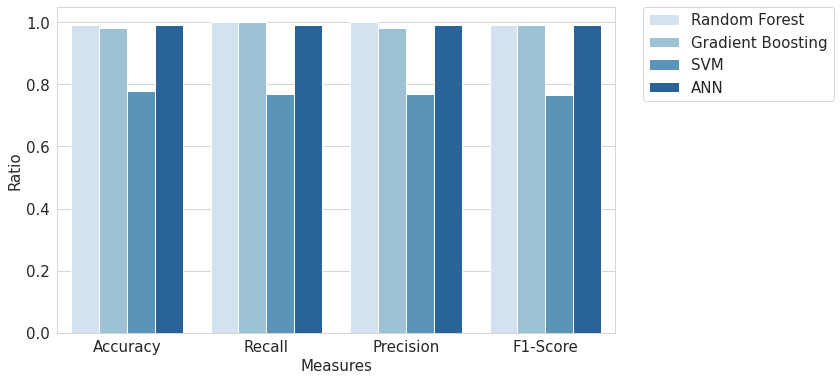

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x = 'classifier', y = 'accuracy', hue = 'data_set', data = df_results,palette = "Blues")
ax.set_xlabel('Measures', fontsize = 15)
ax.set_ylabel('Ratio', fontsize = 15)
ax.tick_params(labelsize = 15)

#Separate legend from graph
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0., fontsize = 15)

# TSNE

In [ ]:
from sklearn.manifold import TSNE
# ploting the 2d data points with seaborn
import seaborn as sn

In [ ]:

model = TSNE(n_components=2, perplexity = 20,random_state=0,learning_rate = 100,init='pca')
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(train_PCA)
# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, y_sm)).T


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


In [ ]:
tsne_data = np.vstack((tsne_data.T, y_sm)).T

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


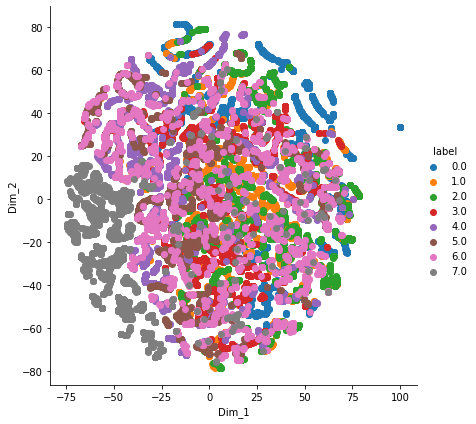

In [ ]:
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2","label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


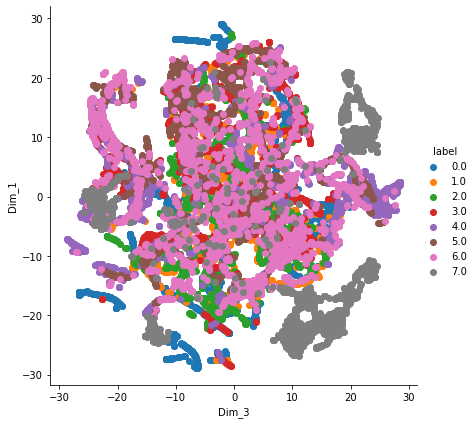

In [ ]:
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_3', 'Dim_1').add_legend()
plt.show()

In [ ]:
X_transform = pd.DataFrame(data = tsne_data, columns = ["TSNE component 1", "TSNE component 2","y_sm"])
X_train, X_test, y_train, y_test = train_test_split(X_transform, y_sm, test_size=0.20, random_state=32)
from sklearn.metrics import classification_report

In [ ]:
tic=time.time()
model = KNeighborsClassifier(n_neighbors=1,p=1 )
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred,target_names=my_tags))
toc=time.time()
print("Time Taken without PCA:")
print(toc-tic)

                 precision    recall  f1-score   support

           CHAT       0.99      1.00      1.00       573
           VOIP       0.99      0.99      0.99       581
VIDEO-STREAMING       0.99      0.98      0.99       594
  FILE-TRANSFER       0.97      0.98      0.98       544
       BROWSING       0.96      0.97      0.97       562
          EMAIL       0.96      0.98      0.97       526
            P2P       0.98      0.95      0.96       601
AUDIO-STREAMING       0.99      0.98      0.99       565

       accuracy                           0.98      4546
      macro avg       0.98      0.98      0.98      4546
   weighted avg       0.98      0.98      0.98      4546

Time Taken without PCA:
0.12688612937927246


In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
knprecision,knrecall,knfscore,supportkn=score(y_test,y_pred,average='macro')
print ('Precision : {}'.format(knprecision))
print ('Recall    : {}'.format(knrecall))
print ('F-score   : {}'.format(knfscore))
#print ('Support   : {}'.format(support))

Precision : 0.9790863320383418
Recall    : 0.9794850484943669
F-score   : 0.9792315640645202


In [ ]:
knaccuracy=0.98

In [ ]:
tic=time.time()
clf = svm.SVC(kernel='rbf')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred,target_names=my_tags))
toc=time.time()
print("Time Taken with SVM:")
print(toc-tic)

                 precision    recall  f1-score   support

           CHAT       0.82      0.95      0.88       573
           VOIP       0.73      0.65      0.69       581
VIDEO-STREAMING       0.70      0.59      0.64       594
  FILE-TRANSFER       0.70      0.81      0.75       544
       BROWSING       0.74      0.77      0.75       562
          EMAIL       0.65      0.72      0.68       526
            P2P       0.84      0.71      0.77       601
AUDIO-STREAMING       0.98      0.95      0.97       565

       accuracy                           0.77      4546
      macro avg       0.77      0.77      0.77      4546
   weighted avg       0.77      0.77      0.77      4546

Time Taken with SVM:
14.906667947769165


In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
svprecision,svrecall,svfscore,supportkn=score(y_test,y_pred,average='macro')
print ('Precision : {}'.format(svprecision))
print ('Recall    : {}'.format(svrecall))
print ('F-score   : {}'.format(svfscore))
#print ('Support   : {}'.format(support))

Precision : 0.7682138396224212
Recall    : 0.7689819239708957
F-score   : 0.7654940038919172


In [ ]:
svaccuracy=0.777

In [ ]:
tic=time.time()
gb = GradientBoostingClassifier(n_estimators=300, learning_rate =0.5, max_features=2, max_depth = 10, random_state = 0)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print(classification_report(y_test,y_pred,target_names=my_tags))
toc=time.time()
print("Time Taken for Xgboost:")
print(toc-tic)

                 precision    recall  f1-score   support

           CHAT       1.00      1.00      1.00       573
           VOIP       1.00      1.00      1.00       581
VIDEO-STREAMING       1.00      1.00      1.00       594
  FILE-TRANSFER       1.00      1.00      1.00       544
       BROWSING       1.00      1.00      1.00       562
          EMAIL       1.00      1.00      1.00       526
            P2P       1.00      1.00      1.00       601
AUDIO-STREAMING       1.00      1.00      1.00       565

       accuracy                           1.00      4546
      macro avg       1.00      1.00      1.00      4546
   weighted avg       1.00      1.00      1.00      4546

Time Taken for Xgboost:
17.766650438308716


In [ ]:
gbaccuracy=0.98
gbprecision=0.98
gbrecal=0.99
gbfscore=0.99

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
gbprecision,gbrecall,gbfscore,supportkn=score(y_test,y_pred,average='macro')
print ('Precision : {}'.format(gbprecision))
print ('Recall    : {}'.format(gbrecall))
print ('F-score   : {}'.format(gbfscore))
#print ('Support   : {}'.format(support))

Precision : 1.0
Recall    : 1.0
F-score   : 1.0


In [ ]:
tic=time.time()
classifier = DT(criterion='entropy', random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred,target_names=my_tags))
toc=time.time()
print("Time Taken:")
print(toc-tic)

                 precision    recall  f1-score   support

           CHAT       1.00      1.00      1.00       573
           VOIP       1.00      1.00      1.00       581
VIDEO-STREAMING       1.00      1.00      1.00       594
  FILE-TRANSFER       1.00      1.00      1.00       544
       BROWSING       1.00      1.00      1.00       562
          EMAIL       1.00      1.00      1.00       526
            P2P       1.00      1.00      1.00       601
AUDIO-STREAMING       1.00      1.00      1.00       565

       accuracy                           1.00      4546
      macro avg       1.00      1.00      1.00      4546
   weighted avg       1.00      1.00      1.00      4546

Time Taken:
0.05721879005432129


In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
dtprecision,dtrecall,dtfscore,supportkn=score(y_test,y_pred,average='macro')
print ('Precision : {}'.format(dtprecision))
print ('Recall    : {}'.format(dtrecall))
print ('F-score   : {}'.format(dtfscore))
#print ('Support   : {}'.format(support))

Precision : 1.0
Recall    : 1.0
F-score   : 1.0


In [ ]:
dtaccuracy=1.00

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RF
tic=time.time()
classifier = RF(n_estimators=16, criterion='gini', random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))
toc=time.time()
print("Time Taken:")
print(toc-tic)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       573
           1       1.00      1.00      1.00       581
           2       1.00      1.00      1.00       594
           3       1.00      1.00      1.00       544
           4       1.00      1.00      1.00       562
           5       1.00      1.00      1.00       526
           6       1.00      1.00      1.00       601
           7       1.00      1.00      1.00       565

    accuracy                           1.00      4546
   macro avg       1.00      1.00      1.00      4546
weighted avg       1.00      1.00      1.00      4546

Time Taken:
0.22034668922424316


In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
rfprecision,rfrecall,rffscore,supportkn=score(y_test,y_pred,average='macro')
print ('Precision : {}'.format(rfprecision))
print ('Recall    : {}'.format(rfrecall))
print ('F-score   : {}'.format(rffscore))
#print ('Support   : {}'.format(support))

Precision : 0.9997852233676976
Recall    : 0.9997895622895623
F-score   : 0.9997872118486237


In [ ]:
rfaccuracy=0.99
rfprecision=1.00
rfrecal=0.99
rffscore=0.99

In [ ]:
rfaccuracy=1.00

In [ ]:
tic=time.time()
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgb = XGBClassifier(n_estimators=150)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(classification_report(y_test,y_pred,target_names=my_tags))
toc=time.time()
print("Time Taken for Xgboost:")
print(toc-tic)



                 precision    recall  f1-score   support

           CHAT       1.00      1.00      1.00       573
           VOIP       1.00      1.00      1.00       581
VIDEO-STREAMING       1.00      1.00      1.00       594
  FILE-TRANSFER       1.00      1.00      1.00       544
       BROWSING       1.00      1.00      1.00       562
          EMAIL       1.00      1.00      1.00       526
            P2P       1.00      1.00      1.00       601
AUDIO-STREAMING       1.00      1.00      1.00       565

       accuracy                           1.00      4546
      macro avg       1.00      1.00      1.00      4546
   weighted avg       1.00      1.00      1.00      4546

Time Taken for Xgboost:
3.5832104682922363


In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
xgprecision,xgrecall,xgfscore,xgkn=score(y_test,y_pred,average='macro')
print ('Precision : {}'.format(xgprecision))
print ('Recall    : {}'.format(xgrecall))
print ('F-score   : {}'.format(xgfscore))
#print ('Support   : {}'.format(support))

Precision : 1.0
Recall    : 1.0
F-score   : 1.0


In [ ]:
xgaccuracy=1.0

In [ ]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=4, kernel_initializer='RandomUniform', activation='relu'))
model.add(Dense(256,  kernel_initializer='RandomUniform', activation='relu'))
model.add(Dense(512,  kernel_initializer='RandomUniform', activation='relu'))
model.add(Dense(256,  kernel_initializer='RandomUniform', activation='relu'))
model.add(Dense(512,  kernel_initializer='RandomUniform', activation='relu'))

model.add(Dense(8,activation='softmax'))
#model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=METRICS)
# compiling the model
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=METRICS)

In [ ]:
%%time
#fitting the model
import time
tic=time.time()
history=model.fit(X_train,y_train,epochs=100, validation_data=(X_test,y_test))
toc=time.time()
print("Time Taken is:")
print(toc-tic)

Epoch 1/100
569/569 [==============================] - 9s 11ms/step - loss: 0.5359 - accuracy: 0.9579 - precision: 0.8889 - recall: 0.7580 - auc: 0.9796 - val_loss: 0.0600 - val_accuracy: 0.9958 - val_precision: 0.9833 - val_recall: 0.9828 - val_auc: 0.9998
Epoch 2/100
569/569 [==============================] - 6s 10ms/step - loss: 0.0802 - accuracy: 0.9941 - precision: 0.9766 - recall: 0.9764 - auc: 0.9983 - val_loss: 0.0057 - val_accuracy: 0.9999 - val_precision: 0.9998 - val_recall: 0.9998 - val_auc: 1.0000
Epoch 3/100
569/569 [==============================] - 6s 10ms/step - loss: 0.0014 - accuracy: 1.0000 - precision: 0.9999 - recall: 0.9999 - auc: 1.0000 - val_loss: 2.2348e-04 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000 - val_auc: 1.0000
Epoch 4/100
569/569 [==============================] - 6s 10ms/step - loss: 1.2089e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 6.2560e-05 - val_accuracy: 1.0000 - val_precision: 1.

In [ ]:
ann_accuracy=0.99
ann_recall=0.99
ann_precision=0.99
ann_f1score=0.99

In [ ]:
df_results = pd.DataFrame({'classifier':['Accuracy','Accuracy','Accuracy','Accuracy','Accuracy','Accuracy','Recall','Recall','Recall','Recall','Recall','Recall','Precision','Precision','Precision','Precision','Precision','Precision','F1-Score','F1-Score','F1-Score','F1-Score','F1-Score','F1-Score'],
                           'data_set':['Decision Tree','Random Forest','XGBoost','KNN','SVM','ANN']*4,
                           'accuracy':[dtaccuracy,rfaccuracy,xgaccuracy,knaccuracy,svaccuracy,ann_accuracy,dtrecall,rfrecall,xgrecall,knrecall,svrecall,ann_recall,dtprecision,rfprecision,xgprecision,knprecision,svprecision,ann_precision,dtfscore,rffscore,xgfscore,knfscore,svfscore,ann_f1score]
                           })

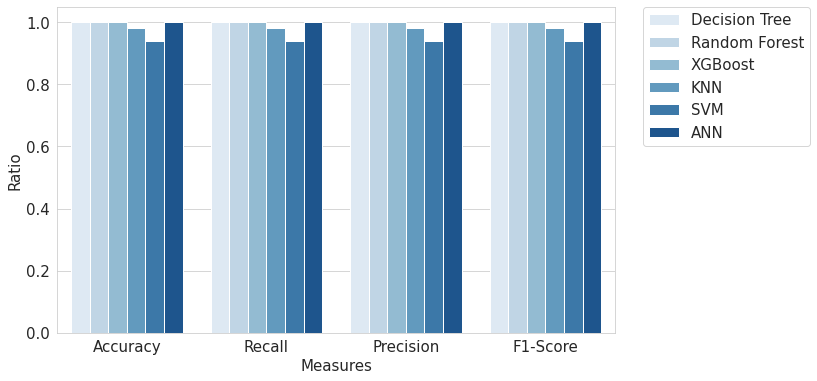

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x = 'classifier', y = 'accuracy', hue = 'data_set', data = df_results,palette = "Blues")
ax.set_xlabel('Measures', fontsize = 15)
ax.set_ylabel('Ratio', fontsize = 15)
ax.tick_params(labelsize = 15)

#Separate legend from graph
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0., fontsize = 15)

# Hyperparaeter Tunig

In [ ]:
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [ ]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
CPU times: user 2.97 s, sys: 164 ms, total: 3.13 s
Wall time: 1min 19s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [ ]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.240945,0.024471,0.024230,0.012914,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.377475,0.372415,0.377778,0.377118,0.376196,0.002195,46
1,0.246965,0.025528,0.014933,0.005936,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.377475,0.372415,0.377778,0.377118,0.376196,0.002195,46
2,0.273537,0.043953,0.016335,0.005304,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.377475,0.372415,0.377778,0.377118,0.376196,0.002195,46
3,0.211529,0.035078,0.010037,0.000308,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.377475,0.372415,0.377778,0.377118,0.376196,0.002195,46
4,0.235198,0.035260,0.017574,0.009206,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.377475,0.372415,0.377778,0.377118,0.376196,0.002195,46


In [ ]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, random_state=42)